## Import Needed Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D , Activation, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adamax,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import  EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print('models loaded')

models loaded


## Read Training Data

In [2]:
data_dir='/kaggle/input/teeth-disease/Teeth_DataSet/Teeth_Dataset'
target_folder='Training'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)
f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
train_df = pd.concat([f_series, l_series], axis=1)
train_df

filepath labels
0     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
1     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
2     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
3     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
4     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
...                                                 ...    ...
3082  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3083  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3084  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3085  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
3086  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP

[3087 rows x 2 columns]

## Read Validation Data

In [3]:
data_dir='/kaggle/input/teeth-disease/Teeth_DataSet/Teeth_Dataset'
target_folder='Validation'
filepath=[]
labels=[]
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        fipath=os.listdir(fpath)
        for image in fipath:
            path = os.path.join(fpath, image)
            filepath.append(path)
            labels.append(f)
f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
valid_df = pd.concat([f_series, l_series], axis=1)
valid_df

filepath labels
0     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
1     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
2     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
3     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
4     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
...                                                 ...    ...
1023  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1024  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1025  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1026  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1027  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP

[1028 rows x 2 columns]

## Read Testing Data

In [4]:
data_dir = '/kaggle/input/teeth-disease/Teeth_DataSet/Teeth_Dataset'
target_folder = 'Testing'
filepath = []
labels = []
all_folder_path = os.path.join(data_dir, target_folder)

if os.path.isdir(all_folder_path):
    filelist = os.listdir(all_folder_path)
    for f in filelist:
        fpath = os.path.join(all_folder_path, f)
        if os.path.isdir(fpath):
            fipath = os.listdir(fpath)
            for image in fipath:
                path = os.path.join(fpath, image)
                filepath.append(path)
                labels.append(f)  
f_series = pd.Series(filepath, name='filepath')
l_series = pd.Series(labels, name='labels')
test_df = pd.concat([f_series, l_series], axis=1)
test_df

filepath labels
0     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
1     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
2     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
3     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
4     /kaggle/input/teeth-disease/Teeth_DataSet/Teet...     OC
...                                                 ...    ...
1023  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1024  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1025  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1026  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP
1027  /kaggle/input/teeth-disease/Teeth_DataSet/Teet...    OLP

[1028 rows x 2 columns]

## Visulization

In [5]:
train_counts = train_df['labels'].value_counts()
train_counts

labels
OLP    540
MC     540
CaS    480
CoS    450
OT     393
Gum    360
OC     324
Name: count, dtype: int64

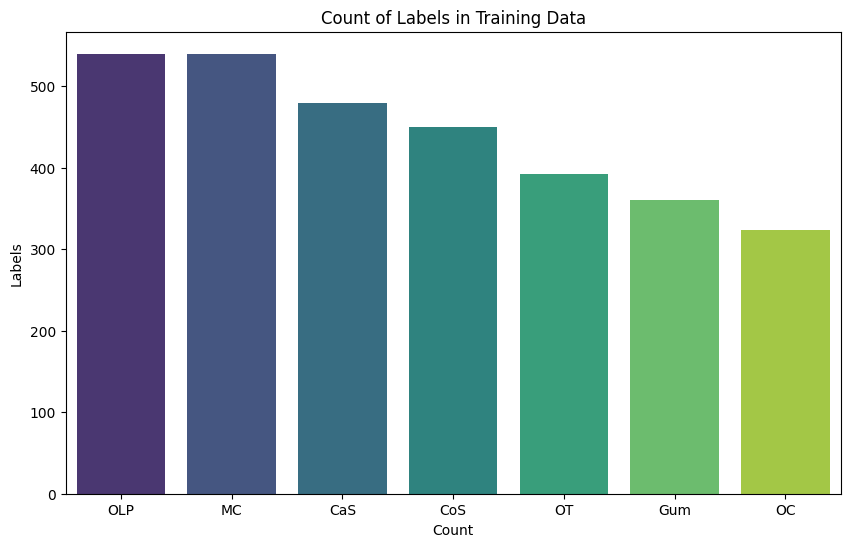

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x=train_counts.index,y=train_counts.values,palette='viridis')
plt.title('Count of Labels in Training Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

In [7]:
valid_counts = valid_df['labels'].value_counts()
valid_counts

labels
OLP    180
MC     180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64

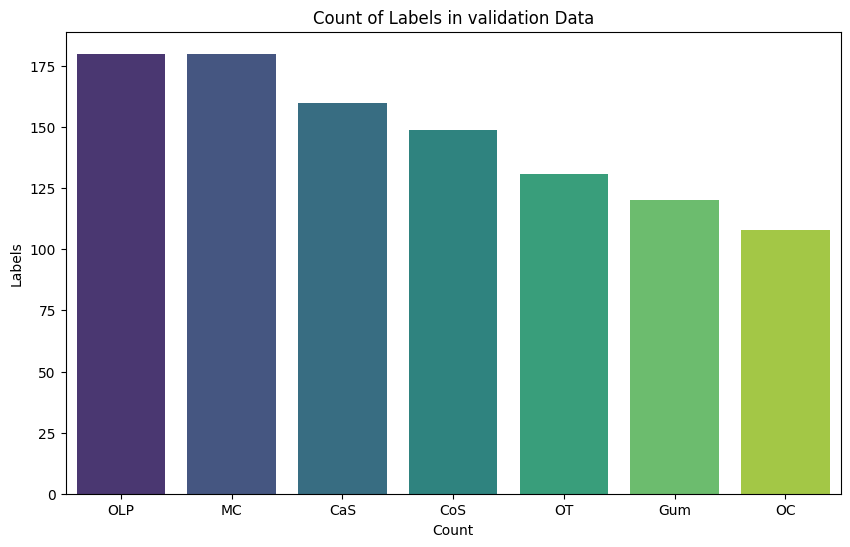

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=valid_counts.index,y=valid_counts.values,palette='viridis')
plt.title('Count of Labels in validation Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

In [9]:
test_counts = test_df['labels'].value_counts()
test_counts

labels
OLP    180
MC     180
CaS    160
CoS    149
OT     131
Gum    120
OC     108
Name: count, dtype: int64

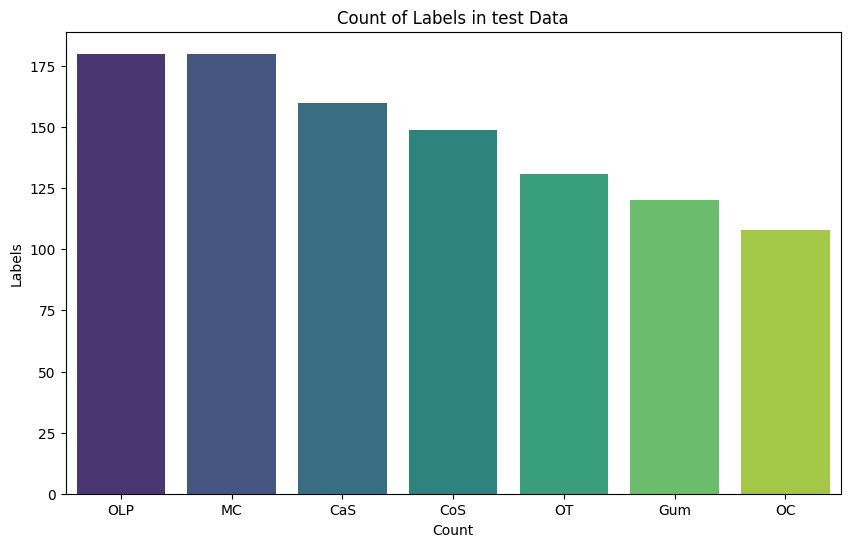

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=test_counts.index,y=test_counts.values,palette='viridis')
plt.title('Count of Labels in test Data')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()

## Sample from Data before Augmentation

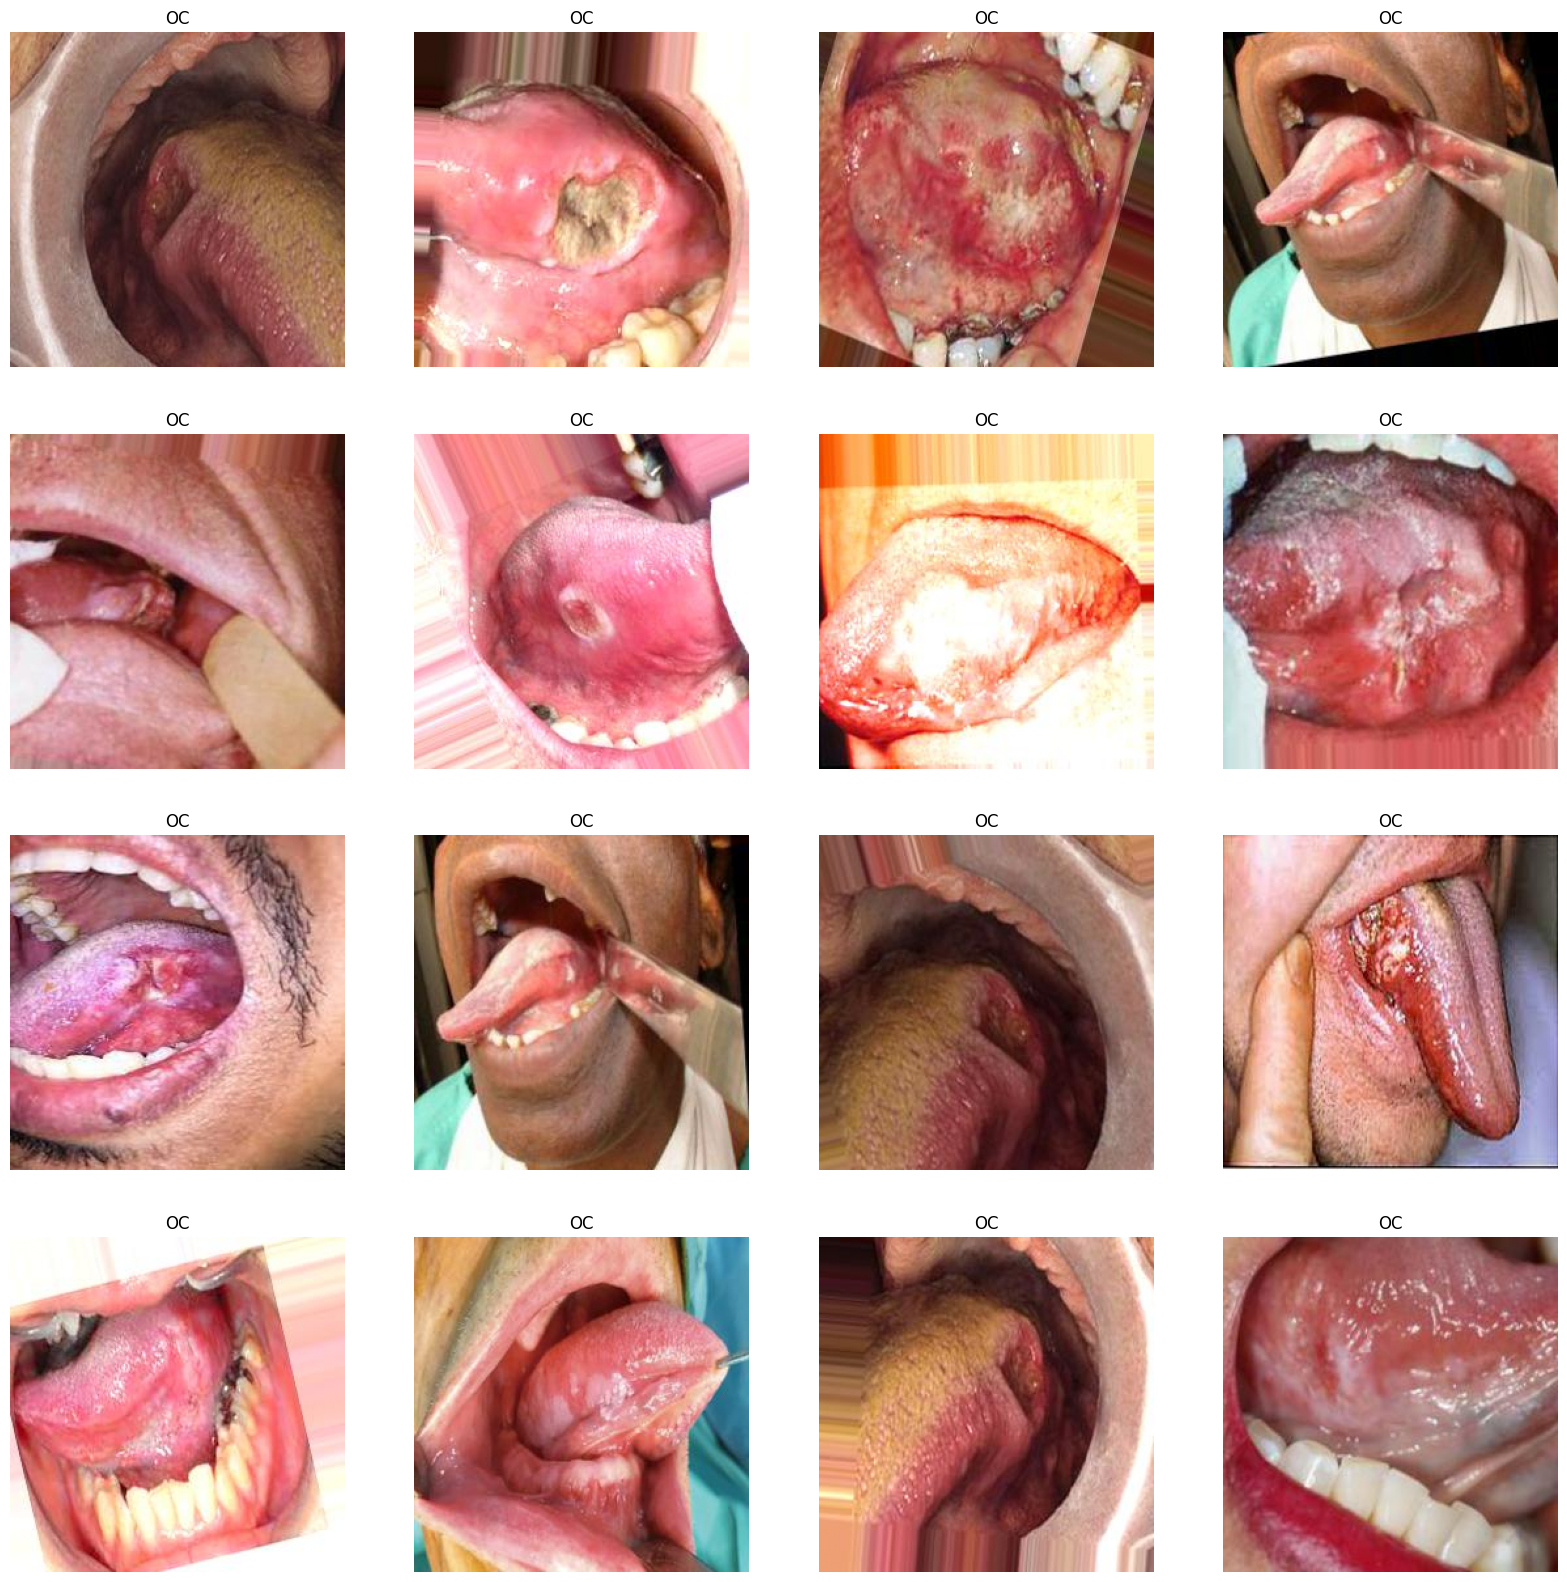

In [11]:
classes = train_df['labels'].unique()

g_dict = {class_name: index for index, class_name in enumerate(classes)}
plt.figure(figsize=(20, 20))
for i in range(min(16, len(train_df))):
    plt.subplot(4, 4, i + 1)
    img_path = train_df.iloc[i]['filepath']
    image = Image.open(img_path)
    image = np.array(image) / 255  
    plt.imshow(image)
    class_name = train_df.iloc[i]['labels']
    plt.title(class_name, color='black', fontsize=12)
    plt.axis('off')
plt.show()

In [12]:
print(train_df.shape)
print(valid_df.shape)
print(test_df.shape)

(3087, 2)
(1028, 2)
(1028, 2)


## Apply Augmentation

In [13]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tra_gen = ImageDataGenerator(rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.2, 1.2])
ts_gen=ImageDataGenerator()

train_gen = tra_gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size,
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, 
                                    class_mode= 'categorical',color_mode= 'rgb', shuffle= True, batch_size= batch_size)

Found 3087 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.
Found 1028 validated image filenames belonging to 7 classes.


## Sample From Data After Augmentation

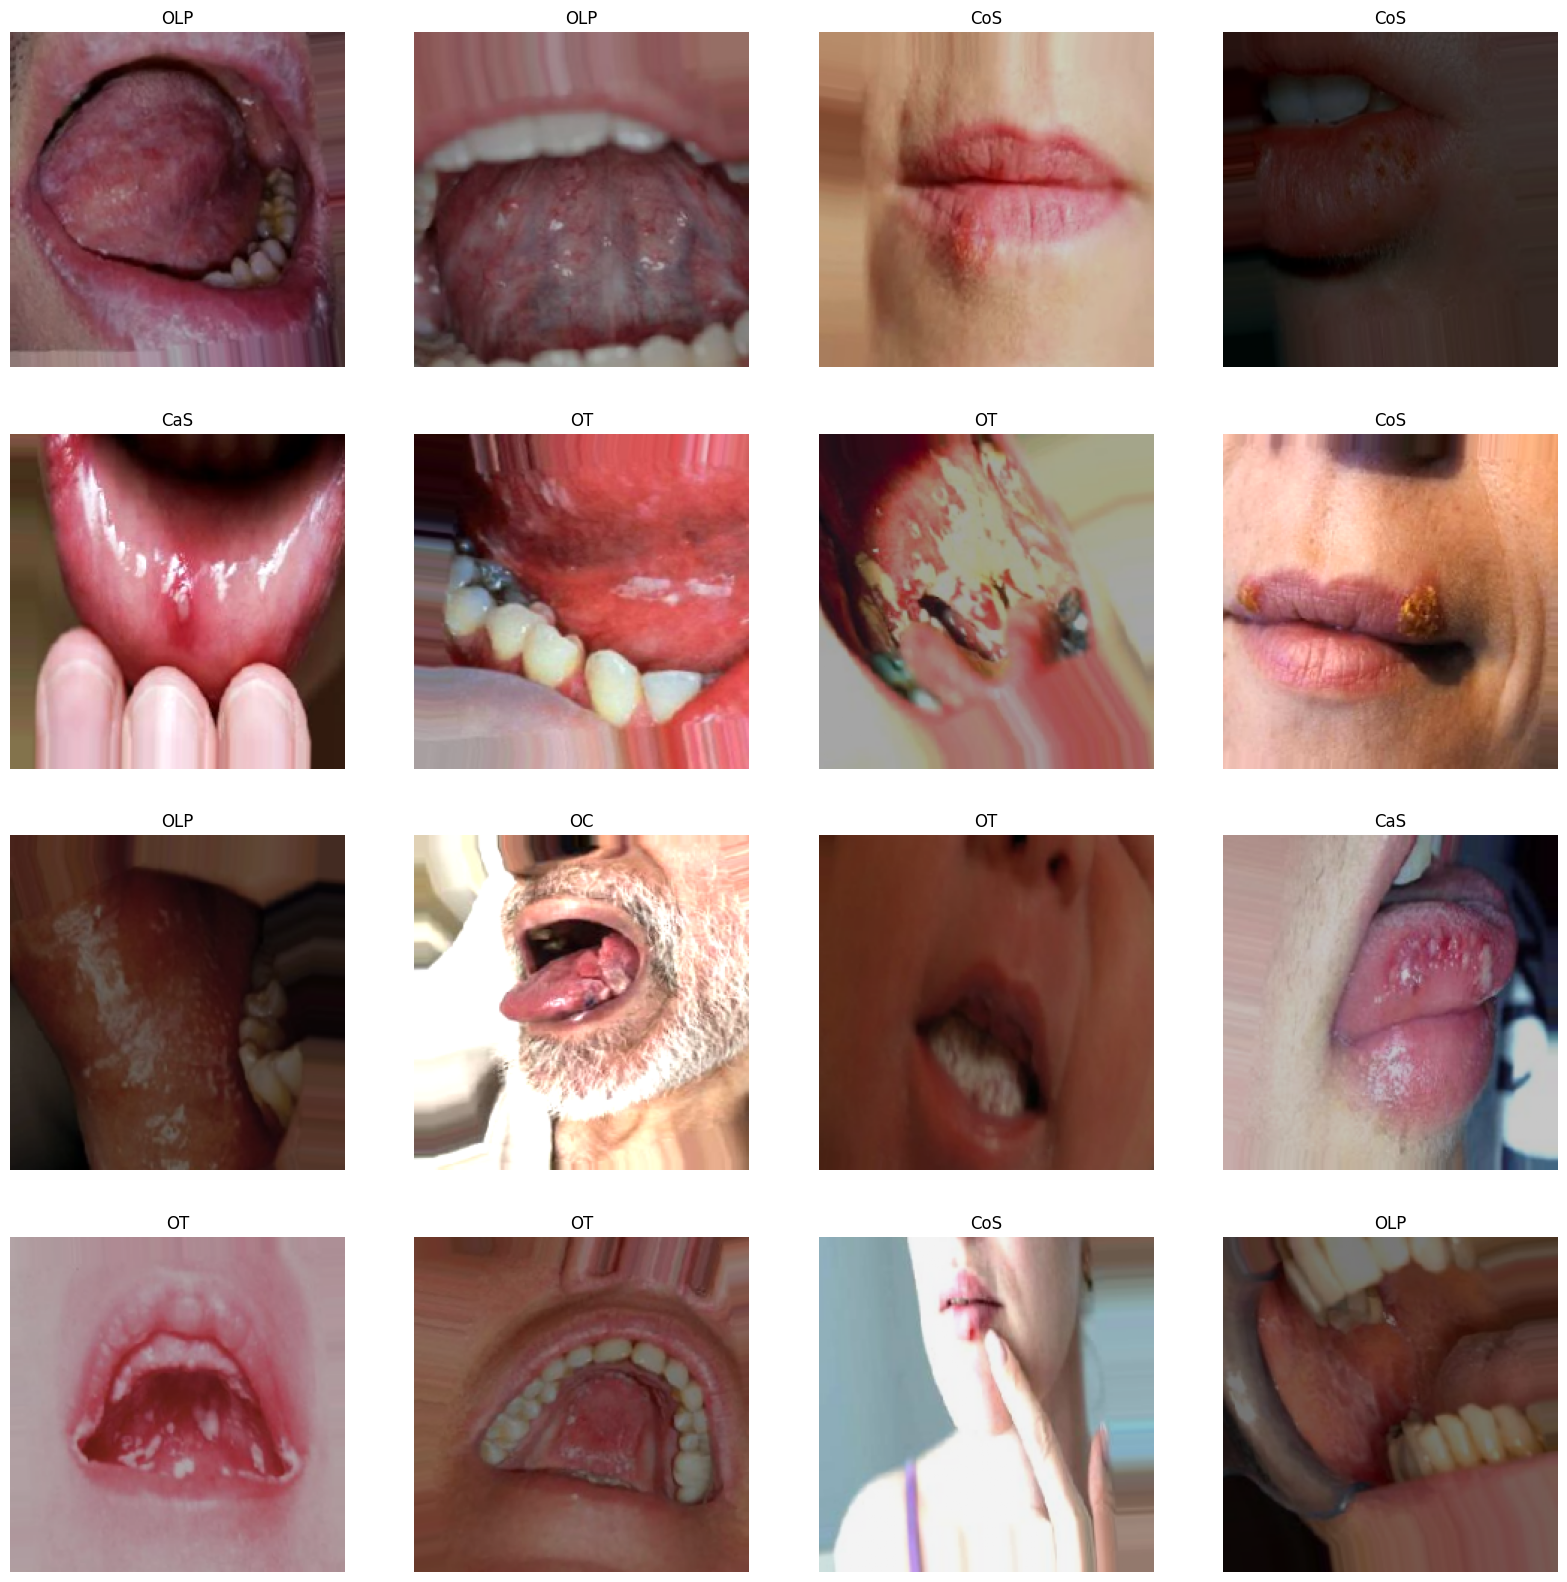

In [14]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

## Build Model

In [15]:
base_model=keras.applications.EfficientNetB0(include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(128,activation='relu'),
    Dense(7,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,139,946 (76.83 MB)

 Trainable params: 20,097,923 (76.67 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [17]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
history=model.fit(train_gen,epochs=100,validation_data=valid_gen,shuffle=False,
                  callbacks=[early_stopping])

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.3073 - loss: 1.8845 - val_accuracy: 0.3872 - val_loss: 1.6138
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 852ms/step - accuracy: 0.6299 - loss: 1.0655 - val_accuracy: 0.4951 - val_loss: 1.3532
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 848ms/step - accuracy: 0.7230 - loss: 0.8031 - val_accuracy: 0.6070 - val_loss: 1.1099
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 844ms/step - accuracy: 0.8086 - loss: 0.5800 - val_accuracy: 0.7461 - val_loss: 0.7242
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 845ms/step - accuracy: 0.8639 - loss: 0.4349 - val_accuracy: 0.8220 - val_loss: 0.5086
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 848ms/step - accuracy: 0.8815 - loss: 0.3590 - val_accuracy: 0.9086 - val_loss: 0.2985
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 839ms/step - accuracy: 0.9152 - loss: 0.2609 - val_accuracy: 0.9494 - val_loss: 0.1805
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 845ms/step - accuracy: 0.9154 - loss: 0.2457 - va

## Compare between accuracy and Loss

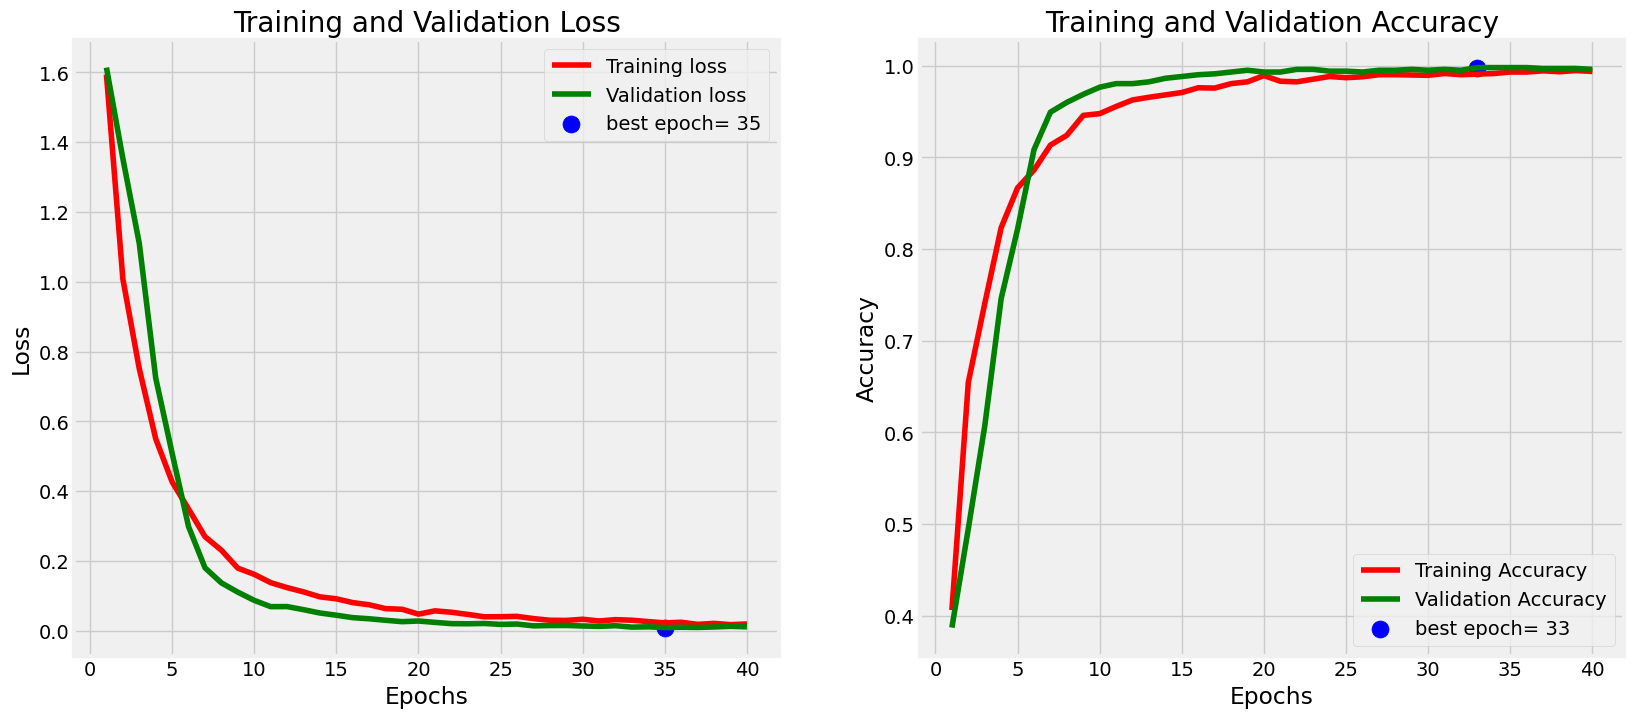

In [18]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

## Evalution

In [19]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

257/257 ━━━━━━━━━━━━━━━━━━━━ 42s 162ms/step - accuracy: 0.9978 - loss: 0.0066 
257/257 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9980 - loss: 0.0092   
257/257 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9980 - loss: 0.0105   
Train Loss:  0.006441728211939335
Train Accuracy:  0.9980563521385193
--------------------
Valid Loss:  0.009179011918604374
Valid Accuracy:  0.9980545043945312
--------------------
Test Loss:  0.01044496614485979
Test Accuracy:  0.9980545043945312


## Confusion Matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


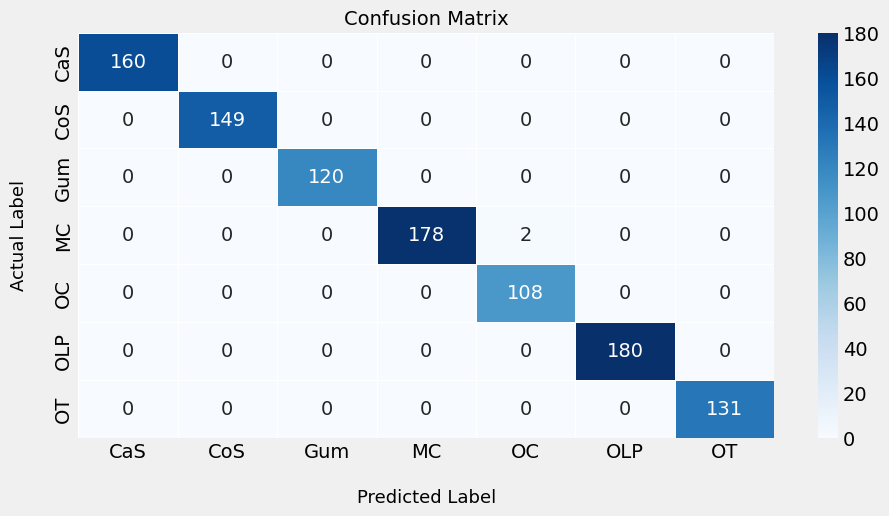

In [20]:
labels = list(test_gen.class_indices.keys())  
num_classes = len(labels)

actual_labels = []
predicted_labels = []

for i in range(len(test_gen)):
    images, batch_labels = test_gen[i]  
    batch_preds = model.predict(images)  

    if batch_labels.ndim > 1 and batch_labels.shape[1] > 1:
        batch_labels = np.argmax(batch_labels, axis=1)
    
    batch_preds = np.argmax(batch_preds, axis=1)

    actual_labels.extend(batch_labels.tolist())
    predicted_labels.extend(batch_preds.tolist())

actual_labels = np.array(actual_labels, dtype=int)
predicted_labels = np.array(predicted_labels, dtype=int)

# Compute Confusion Matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, linewidths=0.5)
plt.xlabel('\nPredicted Label', fontsize=13)
plt.ylabel('Actual Label\n', fontsize=13)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

## Classification Report 

In [21]:
report = classification_report(actual_labels, predicted_labels, target_names=labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

         CaS       1.00      1.00      1.00       160
         CoS       1.00      1.00      1.00       149
         Gum       1.00      1.00      1.00       120
          MC       1.00      0.99      0.99       180
          OC       0.98      1.00      0.99       108
         OLP       1.00      1.00      1.00       180
          OT       1.00      1.00      1.00       131

    accuracy                           1.00      1028
   macro avg       1.00      1.00      1.00      1028
weighted avg       1.00      1.00      1.00      1028



## Save Model

In [22]:
model.save('teeth_classification_pretrain.h5')